<a href="https://colab.research.google.com/github/SamruddhiMhatre/Deep-Learning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [221]:
# pip install comet

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [163]:
tf.__version__

'2.5.0'

Importing data from directory

In [164]:
import tensorflow as tf
import os
import pathlib

url = 'http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

In [165]:
class DataLoader:
  """
  Data loading class: From loading data from a given path to 
  preparation of train,test and validation data
  """
  def __init__(self, path, filename = None, cachedir = None):
    self.path = path
    self.filename = filename
    self.cachedir = cachedir


  def load_dataset(self):
    dataset = tf.keras.utils.get_file(self.filename, 
                                      self.path, 
                                      untar=True, 
                                      cache_dir= self.cachedir,
                                      cache_subdir = '')

    dataset_dir = pathlib.Path(dataset).parent

    return dataset_dir


  def train_dir(self, dataset_dir, train_path):
    self.dataset_dir = dataset_dir
    self.train_path = train_path
    train_dir = os.path.join(dataset_dir, self.train_path)
    print('Train directory: ', os.listdir(train_dir))

    return train_dir


  def test_dir(self, dataset_dir, test_path):
    self.dataset_dir = dataset_dir
    self.test_path = test_path
    test_dir = os.path.join(dataset_dir, self.test_path)
    print('Test directory: ', os.listdir(test_dir))

    return test_dir

  
  def read_conent(self, directory, content_path):
    '''Returns output of the text files (only)
       in the train/test directory
        
       directory: train/test directory or directory which contents the data(text files)
       content_path: path to the content you want to display'''

    self.directory = directory
    self.content_path = content_path
    sample_file = os.path.join(self.directory, self.content_path)
    with open(sample_file) as f:
      print(f.read())


  def load_train_data(self, train_dir, validation_split, batch_size=None, seed=None):
    self.train_dir = train_dir
    self.validation_split = validation_split
    self.batch_size = batch_size
    self.seed = seed
    
     
    # raw train data ------> make as one, not separate for val and test
    raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
        self.train_dir,
        labels='inferred',
        seed=self.seed,
        batch_size=self.batch_size,
        validation_split=self.validation_split,
        subset = 'training')

    print('Number of batches in training set: ', tf.data.experimental.cardinality(raw_train_ds), '\n')

    return raw_train_ds


  def load_validation_data(self, train_dir, validation_split, batch_size=None, seed=None):
    self.train_dir = train_dir
    self.batch_size = batch_size
    self.seed = seed
    self.validation_split = validation_split

    # raw validation data
    raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
        self.train_dir,
        labels='inferred',
        seed=self.seed,
        batch_size=self.batch_size,
        validation_split=self.validation_split,
        subset = 'validation')

    print('Number of batches in validation set: ', tf.data.experimental.cardinality(raw_val_ds),'\n')

    return raw_val_ds


  def load_test_data(self, test_dir, batch_size):
    self.test_dir = test_dir
    self.batch_size = batch_size

    # raw test data
    raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    self.test_dir,
    batch_size = self.batch_size)
    
    print('Number of batches in testing set: ', tf.data.experimental.cardinality(raw_test_ds))

    return raw_test_ds

        


In [166]:
import json
from abc import ABC, abstractmethod

class BaseModel(ABC):
    """Abstract Model class that is inherited to all models"""
    def __init__(self, cfg):
        self.config = Config.from_json(cfg)

    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def build(self):
        pass

    @abstractmethod
    def train(self):
        pass

    @abstractmethod
    def evaluate(self):
        pass

In [167]:
load = DataLoader(path= url, filename = 'stack_overflow_16k.tar.gz', cachedir ='stack_overflow')

dataset_dir = load.load_dataset()
train_dir = load.train_dir(dataset_dir, 'train')
test_dir = load.test_dir(dataset_dir, 'test')
load.read_conent(train_dir,'python/0.txt')
raw_train_ds = load.load_train_data(train_dir=train_dir, validation_split=0.2, batch_size=32,seed=44)
raw_val_ds = load.load_validation_data(train_dir=train_dir, validation_split=0.2, batch_size=32,seed=44)
raw_test_ds = load.load_test_data(test_dir=test_dir, batch_size=32)

Train directory:  ['java', 'csharp', 'python', 'javascript']
Test directory:  ['java', 'csharp', 'python', 'javascript']
"is it legal to define two methods with the same name but different returning types? i've written a piece of code to determine a typical palindrome string. i did this by the definition of a reverse() method returning a string. i also eager to have the same method, but in the void form, because of some future needs..as i add the latter to the code, the valid output will become invalid..so, the question is that is it legal to define two methods with the same name but different returning types?.if not, please let me know how to write this code with the void-type method...class detector(object):.    def __init__(self,string):.        self.string = string..    forbidden = (' ','!','?','.','-','_','&amp;','%',""#"","","")..    def eliminator(self):.        for item in self.forbidden:.            if item in self.string:.                self.string = self.string.replace(item

In [168]:
for item in dataset_dir.iterdir():
  print(item)

/tmp/.keras/stack_overflow_16k.tar.gz.tar.gz
/tmp/.keras/test
/tmp/.keras/README.md
/tmp/.keras/train


In [169]:
# checking position of features

raw_train_ds

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int32)>

In [170]:
# taking a look at the data 

for text_batch, label_batch in raw_train_ds.take(2):
  for i in range(6):
    print("Query", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Query b'"execute the script with special command iceweasel ( which is a firefox webbrowser for debian ) i have a problem, i would like to execute my blank script but with special command like this:..iceweasel \'info.py server.py path_install.py\'...this command must be typed on the client and we open the page with informations :..info.py (= os and ip of client).server.py.path_install.py...but i really don\'t understand where to start this ..."\n'
Label 3
Query b'"toggle elements jquery i have a three a tags on a page. user can ""select"" only one..markup:..&lt;div class=""fl_near""&gt;.  &lt;span class=""title""&gt;title&lt;/span&gt;.  &lt;p&gt;.    &lt;a id=""filter_today"" class=""first_tb"" style=""display: block""&gt;.      &lt;span&gt;text1&lt;/span&gt;.    &lt;/a&gt;.    &lt;a id=""filter_tomorrow""&gt;.      &lt;span&gt;text2&lt;/span&gt;.    &lt;/a&gt;.    &lt;a id=""filter_aftertomorrow"" class=""last_tb selected"" style=""display: block""&gt;.      &lt;span&gt;text3&lt;/span&

In [171]:

max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(   # for batch of strings
    standardize=data_preprocess.text_standardization,
    max_tokens=max_features,
    output_mode='binary'              #  binary mode to build bag of words model
)


class DataPreprocess:
  def __init__(self):
    pass

  def data_segregation(self, raw_data):
    """
    Storing data separately in the form of text and labels

    Input: Raw Data

    Output: List of Text Batches, List of Label Batches
    """
    
    self.raw_data = raw_data

    texts = []
    labels = []

    for text_batch, label_batch in raw_data:
      texts.append(text_batch)
      labels.append(label_batch)

    return texts, labels

  
  def text_standardization(self, text):
    """
    Input: Batch Text list

    Output: Returns list after removing the html tags from the lower cased text
    """

    self.text = text
    text = tf.strings.lower(text)
    cleantext = tf.strings.regex_replace(text,"<[^>]+>", " ")

    return cleantext






In [172]:
# storing questions and their lables for train, validation and test

data_preprocess = DataPreprocess()
train_texts, train_labels = data_preprocess.data_segregation(raw_train_ds)
val_texts, val_labels = data_preprocess.data_segregation(raw_val_ds)
test_texts, test_labels = data_preprocess.data_segregation(raw_test_ds)

In [173]:
import numpy as np
print('Train set data type:', type(train_texts))
print('Train set shape:', np.asarray(train_texts).shape)

Train set data type: <class 'list'>
Train set shape: (200, 32)


In [174]:
raw_train_ds.class_names

['csharp', 'java', 'javascript', 'python']

In [175]:
print('Label 0 corresponds to class: ', raw_train_ds.class_names[0])
print('Label 1 corresponds to class: ', raw_train_ds.class_names[1])
print('Label 2 corresponds to class: ', raw_train_ds.class_names[2])
print('Label 3 corresponds to class: ', raw_train_ds.class_names[3])

Label 0 corresponds to class:  csharp
Label 1 corresponds to class:  java
Label 2 corresponds to class:  javascript
Label 3 corresponds to class:  python


In [176]:
# data standardization
clean = data_preprocess.text_standardization(train_texts)
clean

<tf.Tensor: shape=(200, 32), dtype=string, numpy=
array([[b'"can\'t get the method to work i have this method here, which converts an image to a byte array...public byte[] imagetocompressedbytearray(image image) throws ioexception {.//load the image.string f = ""c:\\users\\mamed\\documents\\netbeansprojects\\main\\src\\resources\\accept.png"";.image = imageio.read(new fileinputstream(new file(f)));...// get image size.int width = image.getwidth(null);.int height = image.getheight(null);...try {.  int[] imagesource = new int[width * height];.  pixelgrabber pg = new pixelgrabber(image, 0, 0, width, height, imagesource, 0, width);.  pg.grabpixels();...  bytearrayoutputstream bytestream = new bytearrayoutputstream(); .  gzipoutputstream zippedstream = new gzipoutputstream(bytestream);.  objectoutputstream objectstream = new objectoutputstream(zippedstream);.  objectstream.writeshort(width);.  objectstream.writeshort(height);.  objectstream.writeobject(imagesource);.  objectstream.flush();.

[TextVectorization API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization)

In [177]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(   # for batch of strings
    standardize=data_preprocess.text_standardization,
    max_tokens=max_features,
    output_mode='binary'              #  binary mode to build bag of words model
)


In [178]:
# # Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)


In [179]:
text_batch, label_batch = next(iter(raw_train_ds))
tf.expand_dims(text_batch[0],-1).shape.as_list()

[1]

In [181]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [182]:
# retrieve a batch (of 32 reviews and labels) from the dataset. axis = 0

text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[7], label_batch[7]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"when we use new keyword for create new datetime (object) what is the different between this..datetime thistime = new datetime();...and this..datetime thistime;...who is the better performance, and who is the better practice for used. for beginning when is create is have the same date times. i used thistime to add datetime from file who has 8000 rows, with method parseexact()."\n', shape=(), dtype=string)
Label csharp
Vectorized review (<tf.Tensor: shape=(1, 10000), dtype=float32, numpy=array([[1., 1., 1., ..., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [183]:
# text vectorization

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [184]:
AUTOTUNE = tf.data.AUTOTUNE
def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)
  
train_ds = configure_dataset(train_ds)
val_ds = configure_dataset(val_ds)
test_ds = configure_dataset(test_ds)

In [185]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 9999 ---> ",vectorize_layer.get_vocabulary()[908])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  it?"
 9999 --->  collection
Vocabulary size: 10000


In [186]:
def build_model(num_labels):
  
  model = tf.keras.Sequential([
  layers.Dense(num_labels)])

  return model

In [187]:
def compile_model(model, train_data, validation_data, epochs, loss, optimizer, metrics):
  model.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
  
  model_history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs)
  
  return model_history





  


In [188]:
model = build_model(4)


model_history = compile_model(model, 
                train_ds,
                val_ds, 
                10,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['accuracy']
                )



Epoch 1/10
200/200 [==============================] - 4s 20ms/step - loss: 1.0846 - accuracy: 0.6687 - val_loss: 0.8933 - val_accuracy: 0.7569
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7358 - accuracy: 0.8327 - val_loss: 0.7422 - val_accuracy: 0.7919
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5876 - accuracy: 0.8745 - val_loss: 0.6665 - val_accuracy: 0.7994
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.8991 - val_loss: 0.6204 - val_accuracy: 0.8000
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.9161 - val_loss: 0.5896 - val_accuracy: 0.8000
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.9294 - val_loss: 0.5676 - val_accuracy: 0.8019
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.9372 - val_loss: 0.5514 - val_accuracy: 0.8031
Epoch

In [189]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 3s 10ms/step - loss: 0.5114 - accuracy: 0.8085
Loss:  0.5113703012466431
Accuracy:  0.8084999918937683


In [190]:
history_dict = model_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [208]:
def plot(history_dict, value):
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(acc) + 1)

  if value == 'loss':
    train_plot = loss
    val_plot = val_loss
  elif value == 'accuracy':
    train_plot = acc
    val_plot = val_acc

  # "bo" is for "blue dot"
  plt.plot(epochs, train_plot, 'bo', label='Training ' + value)
  # b is for "solid blue line"
  plt.plot(epochs, val_plot, 'b', label='Validation ' + value)
  plt.title('Training and validation ' + value)
  plt.xlabel('Epochs')
  plt.ylabel(value)
  plt.legend()

  plt.show()

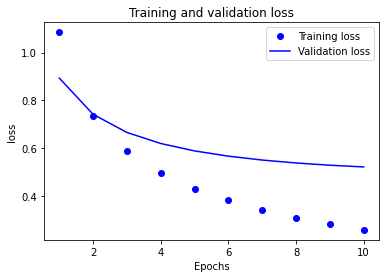

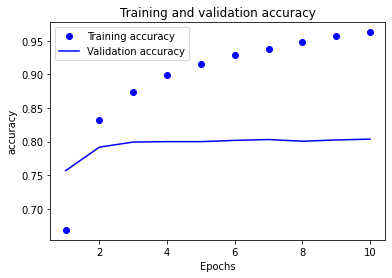

In [209]:
plot(history_dict, value='loss')
print()
plot(history_dict, value='accuracy')

In [216]:
def export_model(model, vectorize_layer):
  export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
  ])

  export_model.compile(
      loss=losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy']
  )

  return export_model


export_model = export_model(model, vectorize_layer)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

250/250 [==============================] - 3s 11ms/step - loss: 0.5114 - accuracy: 0.8085
0.8084999918937683


In [217]:
inputs = [
       '''
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])''',  # python
       '''def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)''',  # java
       ]


# Inferencing on new data
def get_string_labels(predictions):
  predicted_int_labels = tf.argmax(predictions, axis=1)
  predicted_labels = tf.gather(raw_train_ds.class_names,
                               predicted_int_labels)
  return predicted_labels


In [218]:
predictions = export_model.predict(inputs)
predicted_labels = get_string_labels(predictions)
for input, label in zip(inputs, predicted_labels):
  print("Question: ", input)
  print("Predicted label: ", label.numpy())

Question:  
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
Predicted label:  b'javascript'
Question:  def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)
Predicted label:  b'python'


In [219]:
predicted_int_labels = tf.argmax(predictions, axis=1)

In [220]:
predicted_int_labels.numpy()

array([2, 3])

In [ ]:
from tensorflow import keras
export_model.save('/content')


INFO:tensorflow:Assets written to: /content/assets
